### Project : Model Building on fetch_lfw_people (faces) dataset

In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100)

In [3]:
faces.data.shape

(1140, 2914)

In [4]:
#print(faces.DESCR)

In [5]:
faces.images[0].shape

(62, 47)

In [6]:
print(faces.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [7]:
X = faces.data
y = faces.target

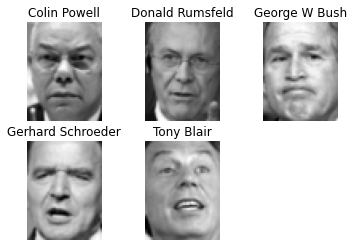

In [8]:
for i in range(5):
    plt.subplot(2,3,i+1)
    x = X[y==i][0]
    plt.imshow(x.reshape(62,47),cmap='gray')
    plt.title(faces.target_names[i])
    plt.axis('off')
plt.show()

In [9]:
np.unique(faces.target)

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
np.bincount(faces.target)

array([236, 121, 530, 109, 144], dtype=int64)

In [11]:
X = faces.data
y = faces.target

In [12]:
X.shape

(1140, 2914)

In [13]:
y.shape

(1140,)

In [14]:
X1 = X[y==2][:140]
y1 = y[y==2][:140]

X2 = X[y==4][:140]
y2 = y[y==4][:140]

In [15]:
X_data = np.concatenate((X1,X2))

y_data = np.concatenate((y1,y2))

In [16]:
X_data.shape

(280, 2914)

In [17]:
y_data.shape

(280,)

In [18]:
np.unique(y_data)

array([2, 4], dtype=int64)

In [19]:
pd.Series(y_data).value_counts()

2    140
4    140
dtype: int64

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X_data,y_data,test_size=30,random_state=10,
                                             shuffle=True)

In [22]:
### using stratify, we can split data into same ratio that we have in y_data(target values)

In [23]:
xtrain.shape

(250, 2914)

In [24]:
xtest.shape

(30, 2914)

In [25]:
pd.Series(ytest).value_counts()

4    19
2    11
dtype: int64

In [26]:
xtrain.max()

255.0

In [27]:
x_train = xtrain/255.0

x_test = xtest/255.0

In [28]:
x_train.max()

1.0

In [29]:
pca = PCA(n_components=.97)

In [30]:
pca_train = pca.fit_transform(x_train)

pca_test = pca.transform(x_test)

In [31]:
pca_train.shape

(250, 119)

In [32]:
log = LogisticRegression()

log.fit(pca_train,ytrain)


test_score = log.score(pca_test,ytest)

train_score = log.score(pca_train,ytrain)

In [33]:
train_score

1.0

In [34]:
test_score

0.9333333333333333

In [35]:
svm_model = SVC(kernel='linear',C=10)

svm_model.fit(pca_train,ytrain)


test_score = svm_model.score(pca_test,ytest)

train_score = svm_model.score(pca_train,ytrain)

In [36]:
train_score

1.0

In [37]:
test_score

0.9

### Test model

In [38]:
img = 'test/t4.jpg'
img1 = cv2.imread(img)

rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

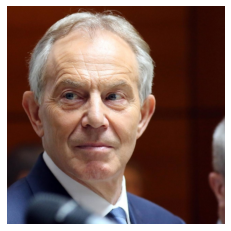

In [39]:
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [40]:

def getface(image): 
    # Read the input image
    img = cv2.imread(image)

    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade
    face_cascade = cv2.CascadeClassifier('xml/frontal_face.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    #face_crop= []
    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
        face = img[y:y + h, x:x + w]
        
        #face_crop.append(faces)
        
        #cv2.imshow("face",faces)
        cv2.imwrite('face.jpg', face)

    # Display the output
    #cv2.imwrite('detcted.jpg', img)
    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    #return face_crop

In [41]:
getface(img)

In [42]:
test_sample = cv2.imread('face.jpg',0)

In [43]:
test_sample.shape

(743, 743)

In [44]:
t = cv2.resize(test_sample,(47,62))

In [45]:
t.shape

(62, 47)

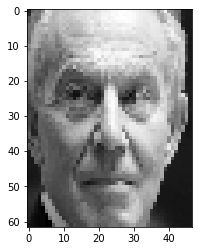

In [46]:
plt.imshow(t,cmap='gray')
plt.show()

In [47]:
t1 = t.reshape(1,-1)

In [48]:
t1.shape

(1, 2914)

In [49]:
t1.max()

252

In [50]:
t2 = t1/t1.max()

In [51]:
t2.max()

1.0

In [52]:
t2.min()

0.015873015873015872

In [53]:
t3 = pca.transform(t2)

In [54]:
t3.shape

(1, 119)

In [55]:
target={2:'George W Bush',4:'Tony Blair'}

In [56]:
index = log.predict(t3)
index

array([4], dtype=int64)

In [57]:
target[index[0]]

'Tony Blair'

In [58]:
index = svm_model.predict(t3)
index

array([4], dtype=int64)

In [59]:
target[index[0]]

'Tony Blair'